In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('wine_data.csv')
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [11]:
df=pd.read_csv('wine_data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.head()

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [13]:
df.columns=['classlabel','Alchol','Mallic Acid']
df.head()

,classlabel,Alchol,Mallic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [14]:
df.shape

(178, 3)

<Axes: xlabel='Alchol', ylabel='Density'>

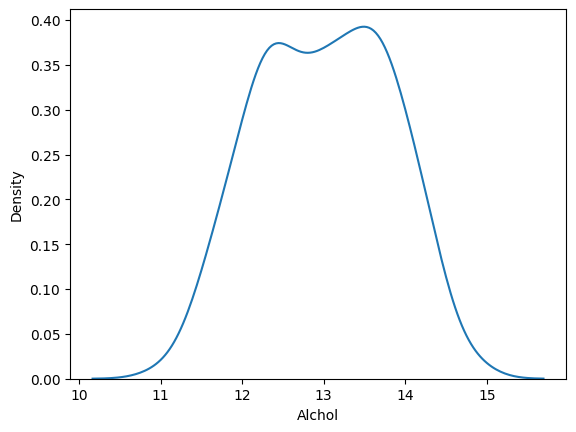

In [16]:
sns.kdeplot(data=df,x='Alchol')

<Axes: xlabel='Alchol', ylabel='Density'>

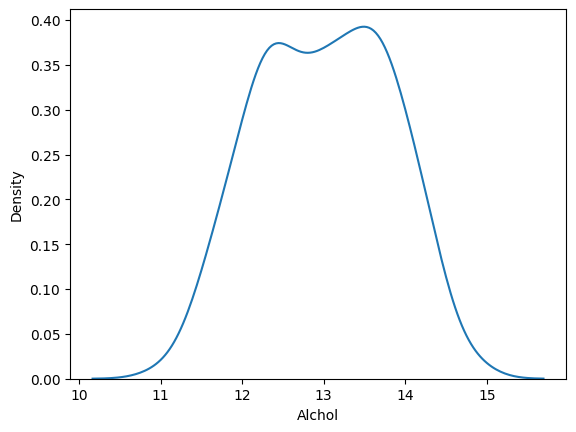

In [17]:
sns.kdeplot(df['Alchol'])

<Axes: xlabel='Mallic Acid', ylabel='Density'>

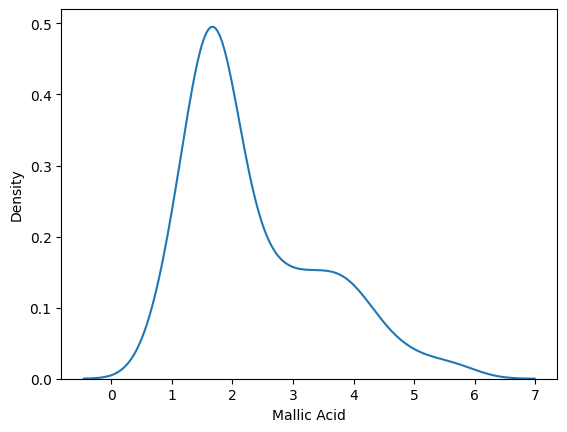

In [19]:
sns.kdeplot(data=df,x='Mallic Acid')

<Axes: xlabel='Mallic Acid', ylabel='Density'>

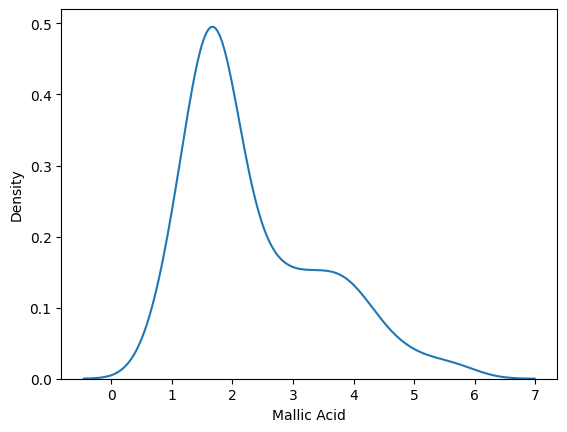

In [20]:
sns.kdeplot(df['Mallic Acid'])

<Axes: xlabel='Alchol', ylabel='Mallic Acid'>

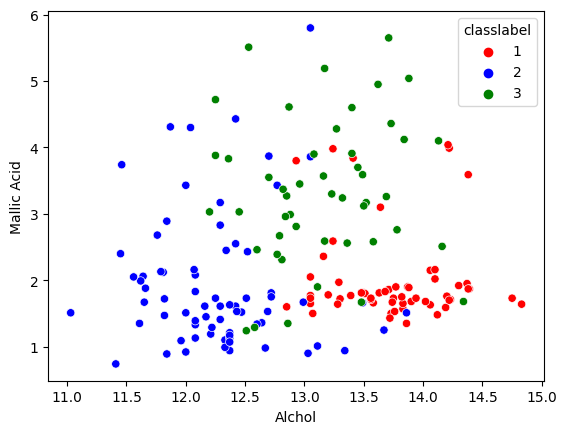

In [23]:
hm={1:'red',2:'blue',3:'green'}
sns.scatterplot(data=df,x='Alchol',y='Mallic Acid',hue='classlabel',palette=hm)

**Train and test split**

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('classlabel',axis=1),
                                               df['classlabel'],
                                               test_size=0.3,
                                               random_state=0)

In [25]:
X_train.shape

(124, 2)

In [26]:
X_test.shape

(54, 2)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#fitting the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

MinMaxScaler()

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#fitting the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transforming the data for both train test and test set
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

In [41]:
#X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled=pd.DataFrame(X_train_scale,columns=X_train.columns)
X_train

,Alchol,Mallic Acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [42]:
X_test_scaled=pd.DataFrame(X_test_scale,columns=X_test.columns)
X_test_scaled.head()

,Alchol,Mallic Acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513


In [37]:
np.round(X_train.describe(),1)

,Alchol,Mallic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


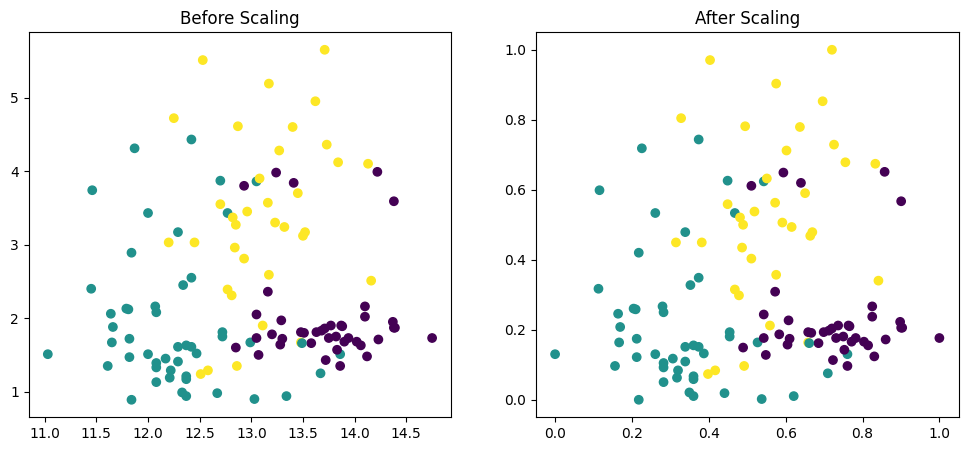

In [43]:
fig ,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scalling
ax1.set_title("Before Scaling")
ax1.scatter(X_train['Alchol'],X_train['Mallic Acid'],c=y_train)

#after scaling
ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Alchol'],X_train_scaled['Mallic Acid'],c=y_train)
plt.show()


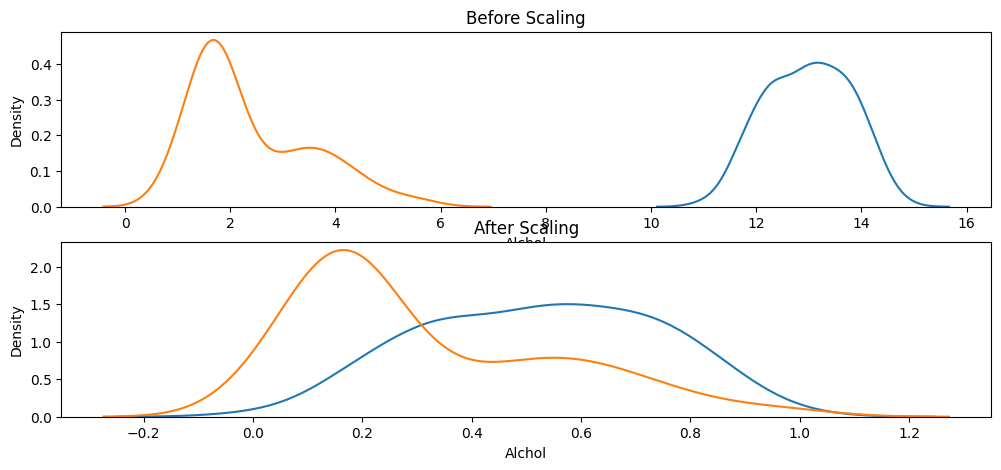

In [44]:
fig,(ax1,ax2)=plt.subplots(nrows=2,figsize=(12,5))
#Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alchol'],ax=ax1)
sns.kdeplot(X_train['Mallic Acid'],ax=ax1)
#After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alchol'],ax=ax2)
sns.kdeplot(X_train_scaled['Mallic Acid'],ax=ax2)
plt.show()

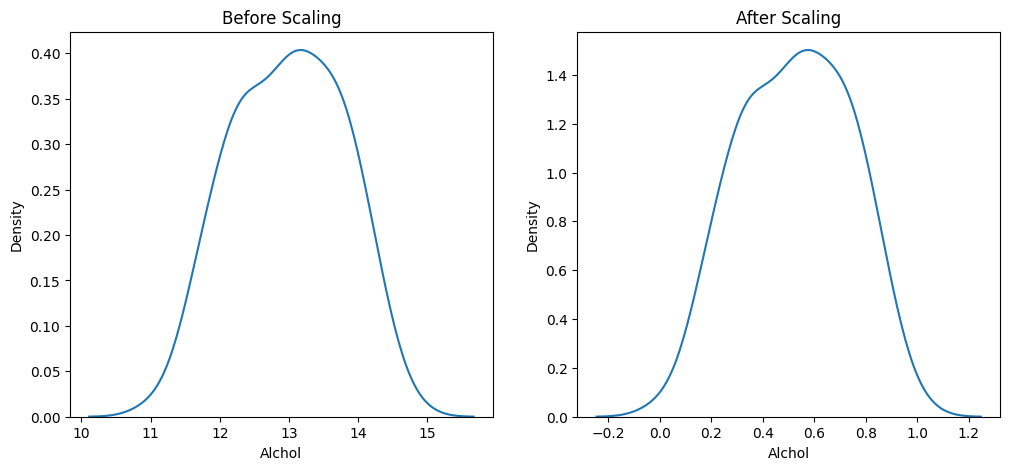

In [46]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alchol'],ax=ax1)

#After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alchol'],ax=ax2)
plt.show()


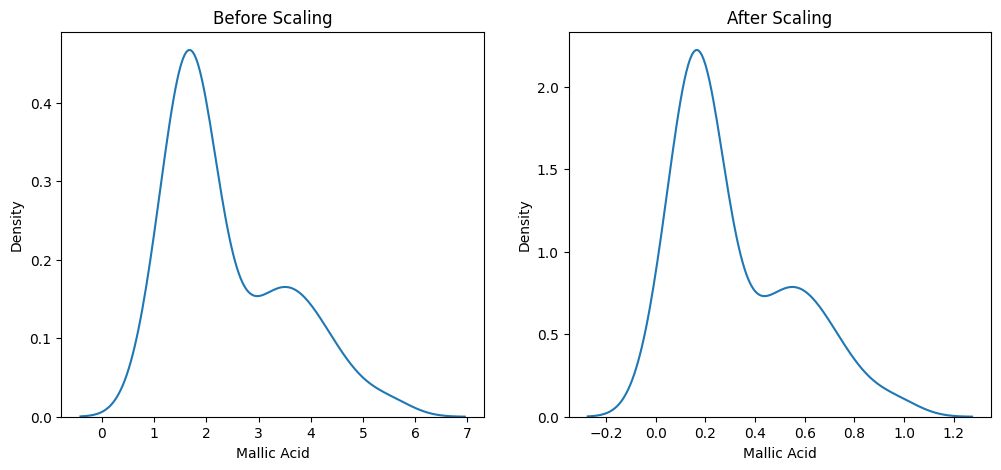

In [47]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Mallic Acid'],ax=ax1)
#After scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Mallic Acid'],ax=ax2)
plt.show()
